In [1]:
%matplotlib widget
# removed as jupyter keeps hanging when trying to rotate the 3D plot

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import sys  

In [3]:
names=["TestID", "fuzzingOperationTimes", "M1_collisionDriveShaftMetric", "M4", "time", "M2_shaftInsertionTimeMetric", "M3_DynamicCollision", "FuzzingOpCount", "Include"]

In [4]:
res_col_subset=["fuzzingOperationTimes", "M1_collisionDriveShaftMetric", "M2_shaftInsertionTimeMetric"]

In [5]:
timebased_res = pd.read_csv("a50-timebased-160-run2", delim_whitespace=True, names=names, header=0)

In [14]:
def plot_3d_resultset(df, df2, graph_title, savefigFilename,xrot,yrot):
    default_alpha = 1.0
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    ax.view_init(xrot,yrot)
    ax.scatter(df["M1_collisionDriveShaftMetric"], df["M2_shaftInsertionTimeMetric"], abs(df["fuzzingOperationTimes"]), color="blue", alpha=default_alpha)
    ax.set_xlabel("M1: collisionDriveShaftMetric")
    ax.set_ylabel("M2: shaftInsertion\nTimeMetric")
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout(pad=0.5)
    plt.savefig(savefigFilename)
    plt.show()

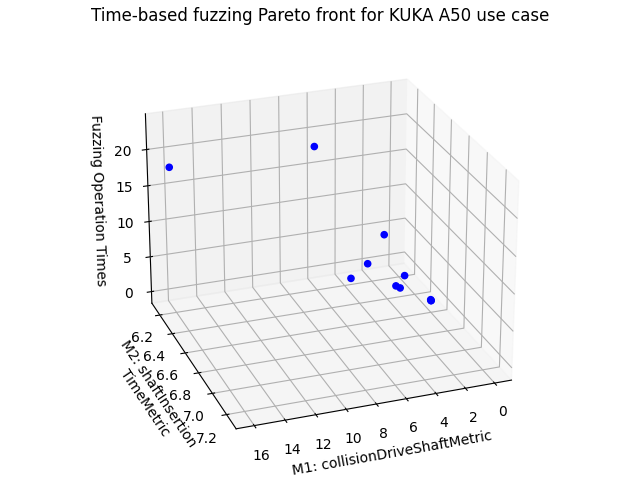

In [15]:
plot_3d_resultset(timebased_res, None, "Time-based fuzzing Pareto front for KUKA A50 use case", "a50-3d-pareto.pdf", 25, 70)